---
# **DECISION TREES AND RANDOM FORESTS**
---

Nabilsh's second workshop of Data Analysis and Machine Learning  This one is all about the decision tree, an interpretable and intuitive '*if-else*' classifier that learns to divide your dataset into subsets according to binary queries against the values of the features such that it separates out data belonging to different classes.



### (1) Loading Essential Libraries
---
Let's import `numpy` and `matplotlib.pyplot` to start, as we'll want to have these available throughout our notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### (2) Generating the Dataset
---
Let's import the `make_classification` function from `sklearn.datasets` and use it to generate some random mock data for a binary classification problem that we can try to solve with a decision tree. We'll generate a dataset comprising 200 examples: these data will have six features - four of these will be useful and informative, while two will be useless and redundant - and belong to two classes.

$\mathbf{X}_{i}=[x_{i}^{(1)}, x_{i}^{(2)},...,x_{i}^{(6)}]$

$y_{i}\in(0,1)$

In [3]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples = 200,
    n_features = 6,
    n_informative = 4,
    n_redundant = 2,
    n_classes = 2,
    random_state = 1
)

### (3) Generating the Training and Testing Datasets
---
Let's import `train_test_split` from `sklearn.model_selection` and use it to split our dataset into a training and testing subsets. We'll optimise our model using the training subset, and then assess the performance using the testing subset. We'll use an 80:20 (training:testing) split, as this is a popular choice. In practice, this choice is often determined by how much data you have available - it often isn't a choice at all!

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 1
)

### (4) Growing Our First Decision Tree
---
The Scikit-Learn decision tree module (`sklearn.tree`) provides both decision trees for classification (`DecisionTreeClassifier`) and regression (`DecisionTreeRegressor`) ready to pot. Familiarise yourself with the documentation for the `DecisionTreeClassifier` and `DecisionTreeRegressor`, and take a look at the documentation for the `sklearn.tree` module too, as it contains plenty of useful functionality that we'll work with later.

For now, let's simply create a decision tree classification model. The decision tree is going to split the data with the objective of minimising the Gini impurity associated with each split, and is going to keep growing until either i) all of the leaves are pure (i.e. each of the leaves contains only a single class and has a Gini impurity of 0.0), or ii) the maximum depth (of three splits) is exceeded.

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion = 'gini', max_depth = 3, random_state = 1
)

### (5) Fitting
---
Let's fit the decision tree classifier to the training data.

In [6]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

### (6) Prediction
---
Let's predict the class labels of the testing data using the decision tree classifier.

In [7]:
y_predict = model.predict(x_test)

### (7) Evaluation
---
We can use the convenient `accuracy_score` function from `sklearn.metrics` to assess the accuracy of our decision tree by comparing the predicted class labels, $\hat{y}$, to the ground-truth class labels, $y$.

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)

print(f'Congratulations! Your decision tree scored an accuracy of {int(accuracy * 100)}%!')

Congratulations! Your decision tree scored an accuracy of 80%!


### (8) Inspection
---
Let's take a look at the decision tree. We can use the `plot_tree` function from `sklearn.tree` to visualise the decision pathways. If we pass the `filled = True` argument to `plot_tree`, the boxes (nodes and leaves) on the decision tree plot are coloured according to their class (im)balance: white boxes are completely mixed (50:50 Classes A:B; Gini impurity = 0.5), while orange and blue boxes are imbalanced one way or the other in favour of either Class A or Class B (and could even be pure; Gini impurity = 0.0).

**Question:** Are all of the leaves on this decision tree pure? If not, how could we make them pure?

[Text(0.4583333333333333, 0.875, 'x[2] <= 0.264\ngini = 0.5\nsamples = 160\nvalue = [82, 78]'),
 Text(0.25, 0.625, 'x[4] <= 0.868\ngini = 0.278\nsamples = 66\nvalue = [11, 55]'),
 Text(0.16666666666666666, 0.375, 'x[4] <= -0.608\ngini = 0.387\nsamples = 42\nvalue = [11, 31]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.25, 0.125, 'gini = 0.477\nsamples = 28\nvalue = [11, 17]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.6666666666666666, 0.625, 'x[4] <= -0.423\ngini = 0.37\nsamples = 94\nvalue = [71, 23]'),
 Text(0.5, 0.375, 'x[2] <= 1.676\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= -1.138\ngini = 0.028\nsamples = 70\nvalue = [69, 1]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 

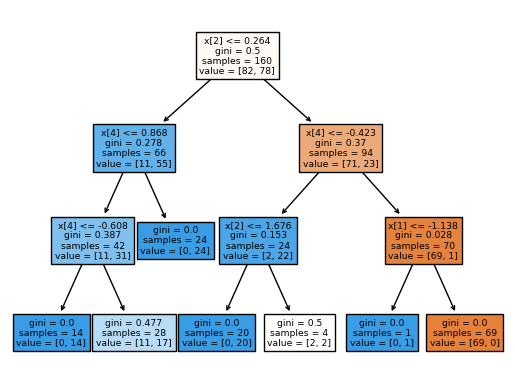

In [9]:
from sklearn.tree import plot_tree

plot_tree(
    model,
    filled = True
)

---
## Workshop Problems
---

### (1) Decision Tree Depth Optimisation
---
The depth of the decision tree (controlled by the `max_depth`) is an important hyperparameter; shallow (or short) decision trees with a low `max_depth` are likely to underfit your data, while deep (or tall) decision trees with a high `max_depth` are likely to overfit your data to the point that the decision tree might memorise your entire dataset if deep enough!

**Task:** Experiment with the `max_depth` hyperparameter. Write a loop over the `max_depth` values 1 through to 10 and, at each iteration, grow a decision tree with that `max_depth`; fit the decision tree, and then evaluate the accuracy score on both the training subset and the testing subset. Print the accuracy score on the training subset and the testing subset at each iteration. What do you see?

**Question:** How deep does the decision tree need to be to i) reach perfect (100\%) performance on the training subset, and ii) reach optimal performance on the testing subset?

In [10]:
max_depths = [i for i in range(1,10)]

for max_depth in max_depths:

  model = DecisionTreeClassifier(criterion = 'gini', max_depth = max_depth, random_state = 1)

  model.fit(x_train, y_train)

  y_predict_test = model.predict(x_test)
  accuracy_test = accuracy_score(y_test, y_predict_test)

  y_predict_train = model.predict(x_train)
  accuracy_train = accuracy_score(y_train, y_predict_train)

  print(
      f'Maximum Tree Depth: {max_depth}'
  )

  print(
    f'Training Accuracy: {int(accuracy_train * 100)}%\t',
    f'Testing Accuracy {int(accuracy_test * 100)}%'
  )


Maximum Tree Depth: 1
Training Accuracy: 78%	 Testing Accuracy 62%
Maximum Tree Depth: 2
Training Accuracy: 91%	 Testing Accuracy 80%
Maximum Tree Depth: 3
Training Accuracy: 91%	 Testing Accuracy 80%
Maximum Tree Depth: 4
Training Accuracy: 97%	 Testing Accuracy 82%
Maximum Tree Depth: 5
Training Accuracy: 98%	 Testing Accuracy 85%
Maximum Tree Depth: 6
Training Accuracy: 99%	 Testing Accuracy 85%
Maximum Tree Depth: 7
Training Accuracy: 100%	 Testing Accuracy 85%
Maximum Tree Depth: 8
Training Accuracy: 100%	 Testing Accuracy 85%
Maximum Tree Depth: 9
Training Accuracy: 100%	 Testing Accuracy 85%


### (2) Decision Tree Regressors
---
The `DecisionTreeRegressor` lets us solve regression problems with decision trees. Let's import the `make_regression` function from `sklearn.datasets` and use it to generate some random mock data for a regression problem that we can try to solve with a decision tree. We'll generate a dataset comprising 100 examples: these data will have two informative features and one regression target.

In [11]:
from sklearn.datasets import make_regression

x, y = make_regression(
    n_samples = 100,
    n_features = 2,
    n_informative = 2,
    n_targets = 1,
    noise = 0.25,
    random_state = 1
)

**Task:** Build a decision tree regressor to solve this problem using the `DecisionTreeRegressor` from `sklearn.tree`. Remember to read the `DecisionTreeRegressor` documentation first; not all of the arguments that are used to create a `DecisionTreeClassifier` still apply to a `DecisionTreeRegressor`! Don't forget to split your data into a training and testing subset. Think about how you're going to evaluate the accuracy of your decision tree. What metrics are available to evaluate accuracy on a regression problem? Check out the `sklearn.metrics` documentation, and import and use an appropriate accuracy metric. What is the best performance you can acheive?

**Question:** Would this problem benefit from scaling or otherwise preprocessing the data? If yes or no - why?

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 1
)

model = DecisionTreeRegressor(
    max_depth = 10, random_state = 1
)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)

print(f'Congratulations! Your decision tree scored an MSE of {mse:.3f}!')

Congratulations! Your decision tree scored an MSE of 277.514!


### (3) Classifying Images of Handwritten Digits with Decision Trees and Random Forests
---
A famous beginner problem in machine learning for image analysis is the recognition of handwritten digits from their (low-resolution; 8$\times$8) scanned images. This is a multiclass classification problem since the dataset contains ten classes (the digits zero and one through to nine). There are 1797 examples in the digits dataset; each comprises 64 features and a single class label corresponding to the identity of the digit. The `sklearn.datasets` module contains a `load_digits` function; we can use the `load_digits` function to load a copy of this dataset, and we'll start by exploring it.

In [18]:
from sklearn.datasets import load_digits

x, y = load_digits(return_X_y = True)

Let's look at the data. Each example has 64 features; these are the pixel intensities of each of the 64 pixels comprising the 8$\times$8-pixel image of the handwritten digit. If we want to view the image, we can use the `imshow` function from `matplotlib.pyplot`, although we'll have to reshape the flattened (1$\times$64) feature vector into its original (8$\times$8) image first.

Try changing the value of the `example` variable at the top of the code block to look at different examples from our dataset.

This image is 3 as a handwritten digit:


(-0.5, 7.5, 7.5, -0.5)

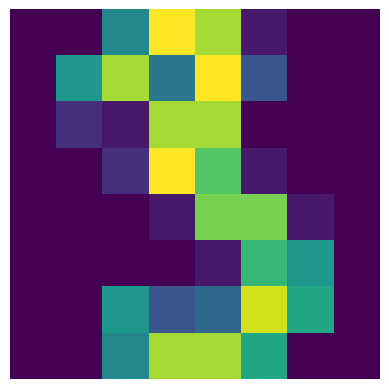

In [19]:
example = 3

print(f'This image is {y[example]} as a handwritten digit:')
plt.imshow(x[example].reshape(8, 8))
plt.axis('off')

**Task:** Build a decision tree classifier to solve this problem using the `DecisionTreeClassifier` from `sklearn.tree`. Don't forget to split your data into a training and testing subset. What is the best performance you can acheive?

**Question:** How deep does the decision tree have to be to attain acceptable performance on this problem?

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 1
)

model = DecisionTreeClassifier(
    criterion = 'gini', max_depth = 10, random_state = 1
)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

accuracy = accuracy_score(y_predict, y_test)

print(f'Congratulations! Your decision tree scored an accuracy of {int(accuracy * 100)}%!')

Congratulations! Your decision tree scored an accuracy of 84%!


We can do better! Let's try to solve this problem with a random forest of decision trees instead.

**Task:** Build a random forest classifier to solve this problem using the `RandomForestClassifier` from `sklearn.tree`. Remember to read the `RandomForestClassifier` documentation first so you're familiar with the additional arguments that the `RandomForestClassifier` takes. How many estimators (decision trees) are you going to use? You'll not need more than 50 for this problem. How deep do the trees need to be? Don't forget to split your data into a training and testing subset! What is the best performance you can acheive?

**Question:** Is the random forest classifier better than the decision tree classifier?

In [21]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 1
)

model = RandomForestClassifier(
    n_estimators = 200, criterion = 'gini', max_depth = 5, random_state = 1
)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

accuracy = accuracy_score(y_predict, y_test)

print(f'Congratulations! Your random forest scored an accuracy of {int(accuracy * 100)}%!')

Congratulations! Your random forest scored an accuracy of 95%!


See the improvement in performance as you grow additional trees!

**Task:** Write a loop over the `n_estimators` values 1 through to 25 and, at each iteration, grow a random forest with that many estimators (trees); fit the random forest, and then evaluate the accuracy score on the testing subset. Save the accuracy score to a list at each iteration, and then plot the value of `n_estimators` against the accuracy.

**Question:** How many trees is enough?

(0.6, 1.0)

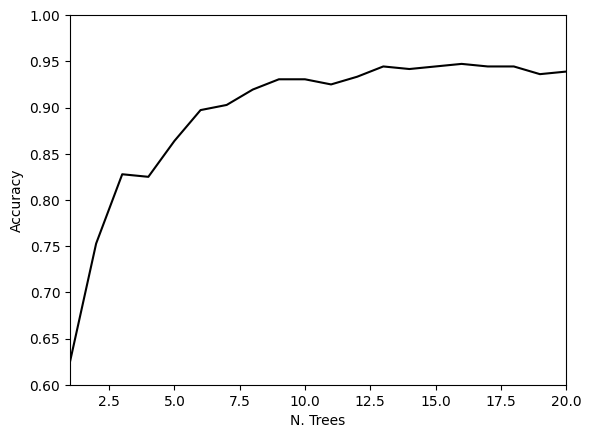

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 1
)

n_estimators = [i for i in range(1, 21)]
accuracy = []

for n in n_estimators:

  model = RandomForestClassifier(
    n_estimators = n, criterion = 'gini', max_depth = 5, random_state = 1
  )

  model.fit(x_train, y_train)

  y_predict = model.predict(x_test)

  accuracy.append(accuracy_score(y_predict, y_test))

plt.plot(n_estimators, accuracy, c = 'black')
plt.xlabel('N. Trees')
plt.xlim(1, 20)
plt.ylabel('Accuracy')
plt.ylim(0.60, 1.00)